In [18]:

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:

from data.processed_mimic.aggregate_mimic import load_mimic_tables, select_labs, aggregate_labs, merge_with_patients_admissions, save_dataset

In [20]:
# MIMIC iv dataset
patients, admissions, labevents, labitems = load_mimic_tables()
selected_labs = ['Potassium', 'Sodium', 'Creatinine', 'Chloride', 'Urea Nitrogen', 'Hematocrit']
filtered = select_labs(labevents, labitems, selected_labs)
admission_labs = aggregate_labs(filtered)
full_data = merge_with_patients_admissions(admission_labs, patients, admissions)
save_dataset(full_data)


Loading raw MIMIC CSVs...
Patients: (100, 6), Admissions: (275, 16), Lab events: (107727, 16), Lab items: (1622, 4)
Saved processed dataset to: c:\Users\sofia\OneDrive\Υπολογιστής\Thesis_New\data\processed_mimic\processed_admissions_selected_labs.csv


In [21]:
import sys
sys.executable


'c:\\Users\\sofia\\OneDrive\\Υπολογιστής\\Thesis_New\\.venv\\Scripts\\python.exe'

In [ ]:
# !c:\Users\sofia\OneDrive\Υπολογιστής\Thesis_New\.venv\Scripts\python.exe -m pip install jpype1


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# import os
# os.path.exists(r"C:\Program Files\Eclipse Adoptium\jdk-17.0.17.10-hotspot\bin\server\jvm.dll")


True

In [ ]:
# import jpype

# jvm_path = r"C:\Program Files\Eclipse Adoptium\jdk-17.0.17.10-hotspot\bin\server\jvm.dll"

# if not jpype.isJVMStarted():
#     jpype.startJVM(
#         jvm_path,
#         "-ea",
#         classpath=[r"jar_files/*"]
#     )


In [6]:
# #import jpype
# #jpype.startJVM("-ea", classpath=['jar_files/*'])

# from data.data_generation.simulate_data import simulate_data_tetrad_simple

# dag, data = simulate_data_tetrad_simple(
#     n_nodes=10,
#     n_samples=500,
#     avg_degree=2,
#     max_degree=3,
#     seed=1
# )

# print(data.head())
# print(dag)


In [ ]:
from data.synthetic_data_generation.final_scm_simulator import simulate_linear_scm

dag, data = simulate_linear_scm(
    n_nodes=10,
    n_samples=500,
    avg_degree=2,
    seed=1
)



print(data.head())
print(dag)


         X1        X2        X3        X4        X5        X6        X7  \
0  1.462108  0.162634 -0.511085  0.888406  1.693809 -4.582325 -3.636497   
1 -2.060141 -0.667864  1.884844  0.641170  0.196870 -2.087351 -5.969630   
2 -0.322417 -1.302195  2.792348  2.526602  0.169869 -1.332960 -7.689159   
3 -0.384054  1.258198 -2.468988 -0.825881 -1.164008  0.804459  4.555325   
4  1.133769  1.190375 -2.797702 -0.622568  0.693366 -1.387691  4.226298   

         X8         X9       X10  
0  1.611514  10.490181 -5.504885  
1 -0.202833  13.248092 -2.256147  
2  1.362661  12.872114 -1.866885  
3 -0.516149  -9.655042  2.183591  
4 -0.711770  -7.729033 -3.659640  
     X1  X2  X3  X4  X5  X6  X7  X8  X9  X10
X1    0   1   0   0   0   0   1   0   0    0
X2    0   0   1   1   0   0   0   0   1    0
X3    0   0   0   0   0   0   1   0   0    0
X4    0   0   0   0   0   1   1   1   1    0
X5    0   0   0   0   0   1   0   0   0    1
X6    0   0   0   0   0   0   1   0   1    1
X7    0   0   0   0   0 

In [23]:
import os

output_dir = os.path.join("data", "synthetic_data")
os.makedirs(output_dir, exist_ok=True)

data.to_csv(os.path.join(output_dir, "simulated_data.csv"), index=False)
dag.to_csv(os.path.join(output_dir, "simulated_dag.csv"))


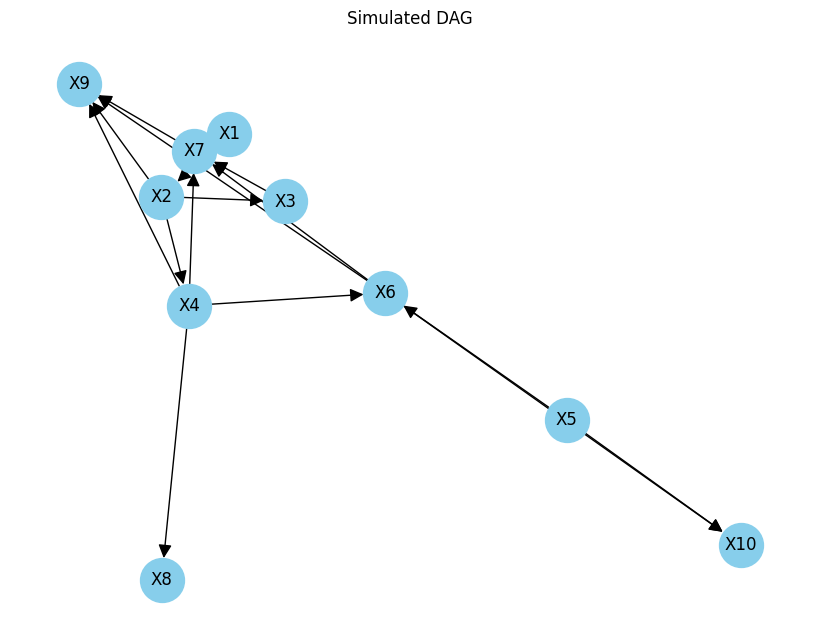

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert the adjacency matrix to a networkx DiGraph
G = nx.from_pandas_adjacency(dag, create_using=nx.DiGraph)

# Draw the DAG
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # nice layout
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', arrowsize=20)
plt.title("Simulated DAG")
plt.show()
